In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
import missingno as msno

In [2]:
credit = pd.read_csv('/content/raw-data.csv', delimiter=',')
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24,0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
1,2,0,1,24,1,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
2,3,0,0,26,0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31.0,31.0,16.0,TIER 1,0.0
3,4,0,0,24,0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
4,5,0,0,27,0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0


In [3]:
#Renaming columns i the dataset witheir correct names
credit_renamed = credit.rename(columns = {'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
credit_renamed.head(2)


,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24,0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
1,2,0,1,24,1,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0


Basic EDA and Data Cleaning


In [4]:

credit_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Customer ID                                                     28012 non-null  int64  
 1   Customer has bounced in first EMI                               28012 non-null  int64  
 2   No of times bounced 12 months                                   28012 non-null  int64  
 3   Maximum MOB                                                     28012 non-null  int64  
 4   No of times bounced while repaying the loan                     28012 non-null  int64  
 5   EMI                                                             28011 non-null  float64
 6   Loan Amount                                                     28011 non-null  float64
 7   Tenure                                           

In [5]:

# Removing irrelevant columns
#irrelevant_columns = ['Time since last Personal loan taken (in months)', 'Time since first consumer durables loan taken (in months)']
#credit_renamed.drop(irrelevant_columns, axis=1, inplace=True)
credit_renamed.shape

(28012, 32)

In [6]:

#Missing value treatment
credit_renamed.dropna(axis=0, how='any', subset=['Loan Amount','Gender'], inplace =True)

In [7]:

'''
#correlation matrix
corrmat = credit_renamed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(credit_renamed[top_corr_features].corr(),annot=True,cmap="viridis")
'''

'\n#correlation matrix\ncorrmat = credit_renamed.corr()\ntop_corr_features = corrmat.index\nplt.figure(figsize=(20,20))\ng=sns.heatmap(credit_renamed[top_corr_features].corr(),annot=True,cmap="viridis")\n'

In [8]:
'\n#correlation matrix\ncorrmat = credit_renamed.corr()\ntop_corr_features = corrmat.index\nplt.figure(figsize=(20,20))\ng=sns.heatmap(credit_renamed[top_corr_features].corr(),annot=True,cmap="viridis")\n'

'\n#correlation matrix\ncorrmat = credit_renamed.corr()\ntop_corr_features = corrmat.index\nplt.figure(figsize=(20,20))\ng=sns.heatmap(credit_renamed[top_corr_features].corr(),annot=True,cmap="viridis")\n'

Target variable
0.0    27328
1.0      683
Name: count, dtype: int64


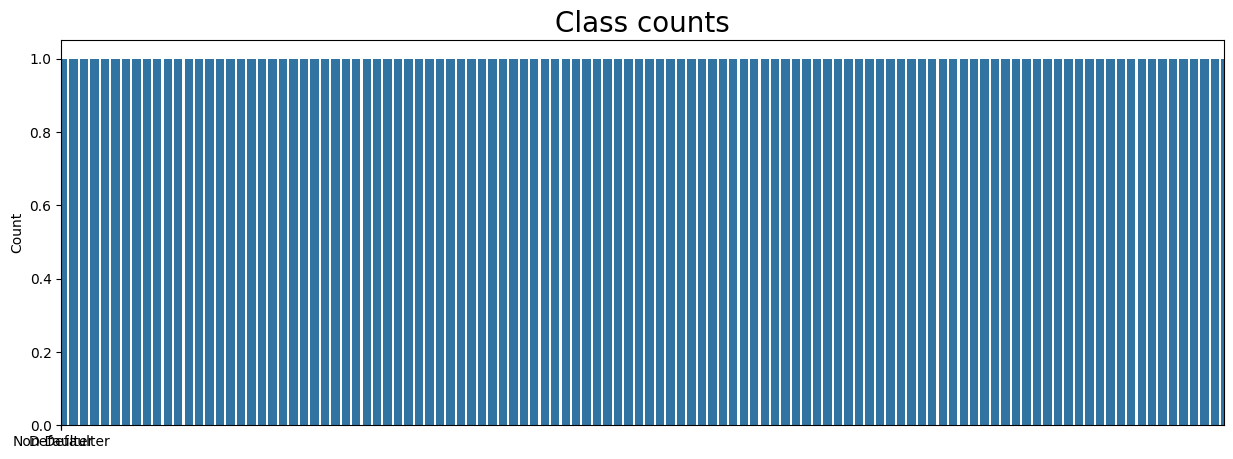

In [9]:

# Getting the number of positive and negative examples.
plt.figure(figsize=(15,5))
sns.countplot(credit_renamed['Target variable'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

print(credit_renamed['Target variable'].value_counts())

<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='Employment type', ylabel='Loan Amount'>

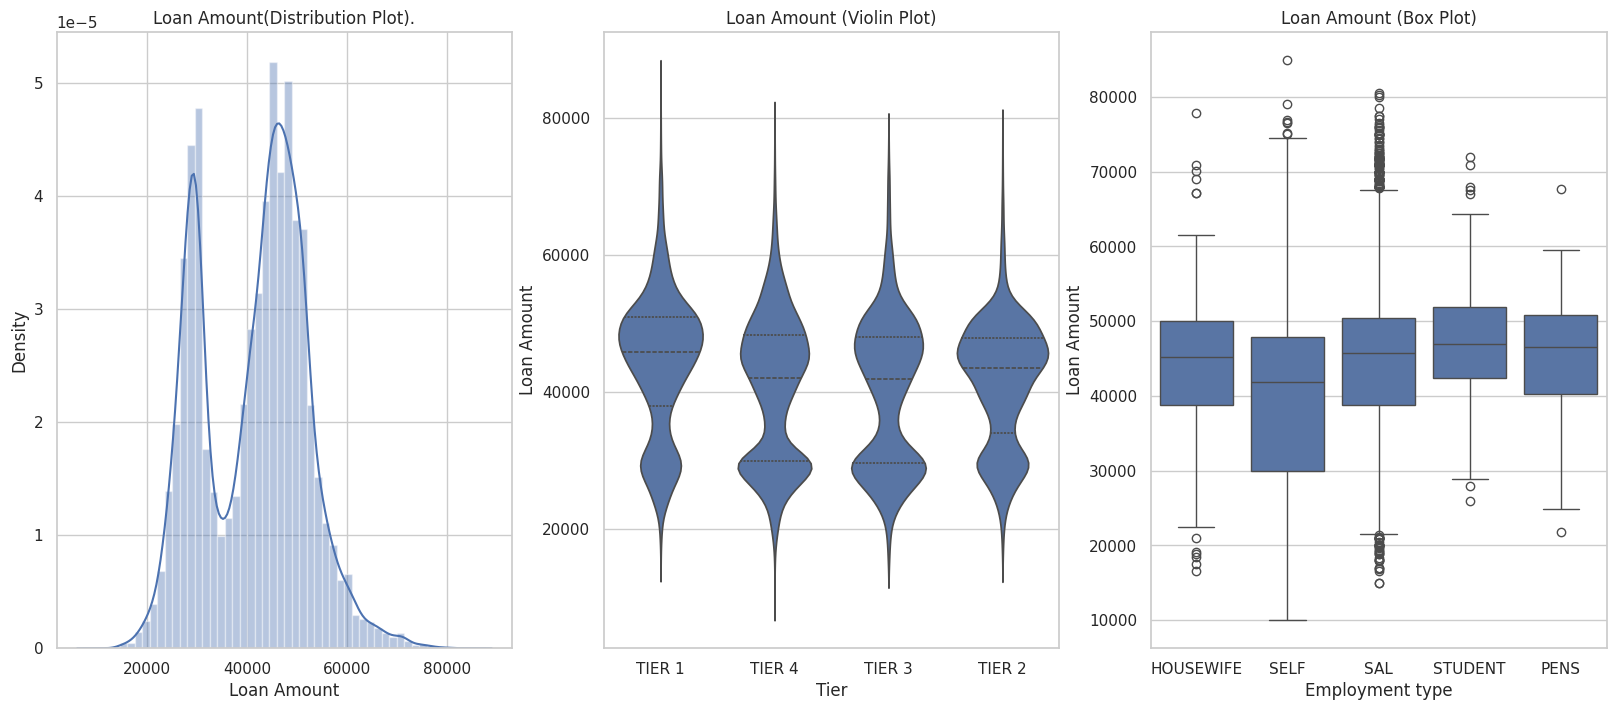

In [10]:

sns.set(style='whitegrid')

fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(20,8))
ax[0].set_title('Loan Amount(Distribution Plot).')
sns.distplot(credit_renamed['Loan Amount'], ax=ax[0])
ax[1].set_title('Loan Amount (Violin Plot)')
sns.violinplot(data = credit_renamed, x='Tier', y = 'Loan Amount', ax=ax[1], inner='quartile')
ax[2].set_title('Loan Amount (Box Plot)')
sns.boxplot(data = credit_renamed, x='Employment type', y='Loan Amount', ax=ax[2], orient='v')

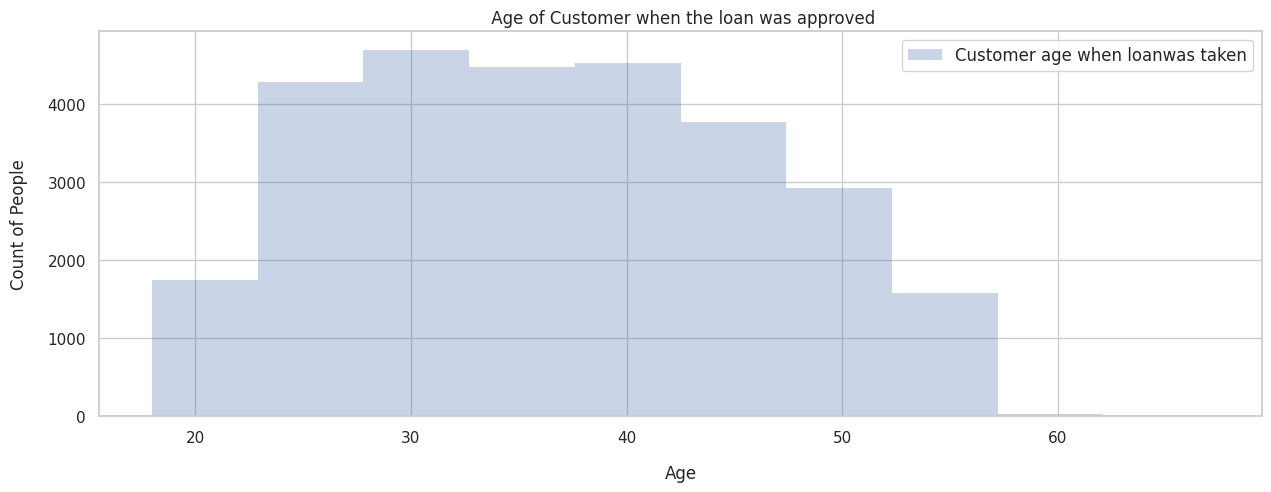

In [11]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
credit_renamed['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

<Axes: xlabel='Customer age when loanwas taken', ylabel='Loan Amount'>

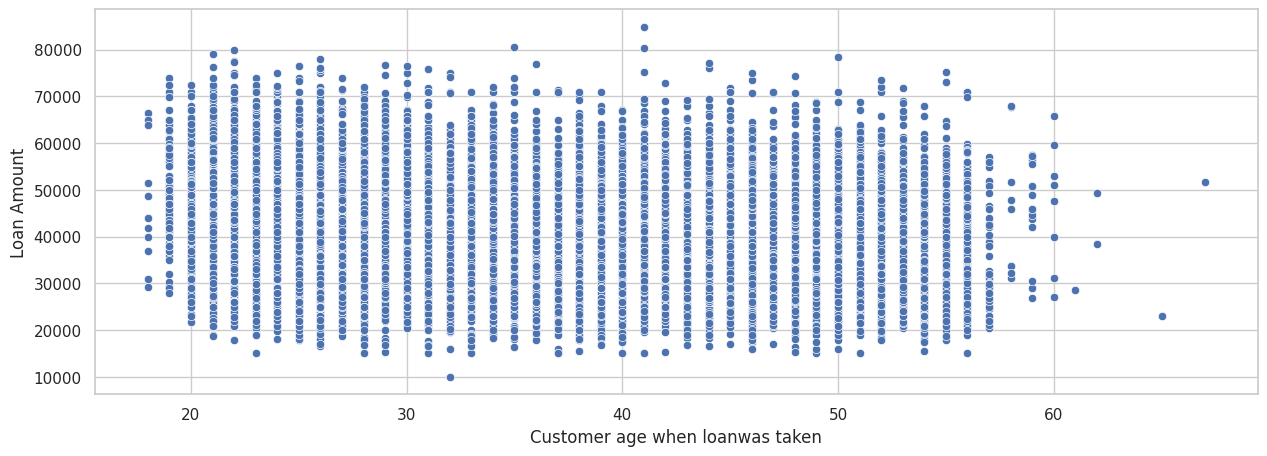

In [12]:

# Explore correlation between age and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(x=credit_renamed['Customer age when loanwas taken'],y='Loan Amount',data=credit_renamed)

In [13]:
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

credit_renamed.drop(dropped,axis=1,inplace=True)

Data Cleaning

In [14]:

data = credit_renamed.copy()

Imputing missing values

In [15]:

CatVariables = data.select_dtypes(include=['object'])
NumVariables = data.select_dtypes(include=['float','int'])

In [16]:
#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [17]:

data.head(1)

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,customer_age_when_loanwas_taken,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24,0,2432.0,46500.0,24.0,1385.0,SC,...,40.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,TIER 1,0.0


In [18]:

numerical_cols = data[NumVariables]
categorical_cols = data[CatVariables]

In [19]:

imp_mean = SimpleImputer(missing_values = np.nan, strategy='median')
lat = imp_mean.fit_transform(numerical_cols)
imp_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
g_se = imp_mode.fit_transform(categorical_cols)

Encoding

In [20]:

#Dealing with categorical columns
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    data[feature] = le.fit_transform(data[feature].astype(str))

Class IMbalance

In [21]:

X = data.drop(['customer_id', 'target_variable'], axis=1)
y=data['target_variable']


<Axes: >

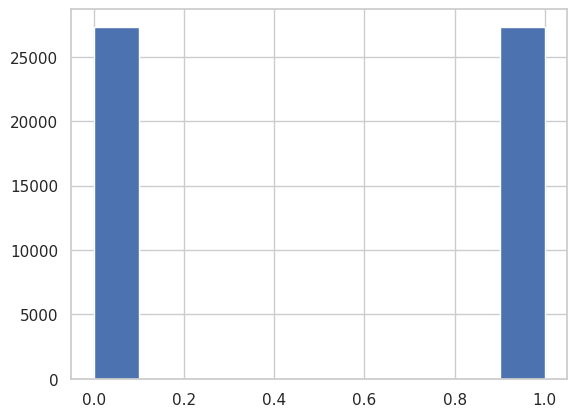

In [22]:

smote_sample = SMOTE(random_state = 124, sampling_strategy = 'auto')
x_res, y_res = smote_sample.fit_resample(X, y)
y_res.hist()

In [23]:
print(x_res.shape,y_res.shape)

(54656, 24) (54656,)


Modelling

KNN model

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score



# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Standardize the features
    ('knn', KNeighborsClassifier())       # KNN classifier
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, x_res, y_res, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Cross-validation scores:  [0.90386023 0.9072363  0.90202177 0.92150764 0.91986095]
Mean cross-validation score:  0.9108973769970385


Performing Hyperparameter tuning on KNN

In [28]:
# Define the parameter grid for KNN
from sklearn.model_selection import GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],     # Example parameter range for number of neighbors
    'knn__weights': ['uniform', 'distance']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_res, y_res)  # Make sure to fit the grid search object

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)  # Use best_params_ with an underscore
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters:  {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Best cross-validation score:  0.9247293462370806


Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC


# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Standardize the features
    ('SVM', SVC())       # SVM classifier
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, x_res, y_res, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Cross-validation scores:  [0.91886206 0.92562437 0.92260543 0.94035312 0.94657396]
Mean cross-validation score:  0.9308037899175492


Performing Hyperparameter tuning on SVM

In [ ]:
# Define the parameter grid for SVM
param_grid = {
    'SVM__C': [0.1, 1, 10],            # Regularization parameter
    'SVM__gamma': ['scale', 'auto'],   # Kernel coefficient
    'SVM__kernel': ['linear', 'rbf']   # Kernel type
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_res, y_res)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params())
print("Best cross-validation score: ", grid_search.best_score_)